In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/trungit/wikiart25k'
od.download(dataset_url, force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: avitakku
Your Kaggle Key: ··········


100%|██████████| 7.74G/7.74G [00:31<00:00, 267MB/s]


In [ ]:
import os

# function to delete incorrectly encoded files

def delete_non_ascii_filenames(directory):
    count = 0
    for subdir, _, files in os.walk(directory):
        for file in files:
            try:
                file.encode('ascii')
            except UnicodeEncodeError:  # Filename is non-ASCII
                full_path = os.path.join(subdir, file)
                os.remove(full_path)  # Delete the file
                count += 1
                print(f"Deleted file: {full_path}")
    return count

# Use the function on your dataset directory and delete non-ASCII files
deleted_count = delete_non_ascii_filenames('wikiart25k')
print(f"Total deleted files: {deleted_count}")


Total deleted files: 0


In [ ]:
import pandas as pd
import os
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision.io import read_image
from transformers import AutoTokenizer
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
df = pd.read_csv('drive/MyDrive/Applied_CV/valid_images.csv')

In [ ]:
# initializing new dataframe
trimmed_valid_images_df = pd.DataFrame(columns=df.columns)

In [ ]:
def get_image_path(art_style, painting, top_dir='wikiart25k'):
    path = f"{top_dir}/{art_style}/{painting}.jpg"
    return path

In [ ]:
# go through each row in the dataset
valid_rows = []

for index, row in df.iterrows():
    art_style = row['art_style']
    print(art_style)
    painting = row['painting']
    print(painting)
    image_path = get_image_path(art_style, painting)

    # check if the image exists in archive
    # if image found, save the row to list
    try:
        with Image.open(image_path):
            valid_rows.append(row)
    except FileNotFoundError:
        continue

# create a new dataframe with the valid rows
trimmed_valid_images_df = pd.DataFrame(valid_rows, columns=df.columns)

# save the new dataframe to a csv file
trimmed_valid_images_df.to_csv('drive/MyDrive/Applied_CV/trimmed_valid_images.csv', index=False)

Streaming output truncated to the last 5000 lines.
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask-of-the-red-death-1883
Symbolism
odilon-redon_the-mask

In [ ]:
model_df = pd.read_csv('drive/MyDrive/Applied_CV/trimmed_valid_images.csv')

In [ ]:
def get_image_path(art_style, painting, top_dir='wikiart25k'):
    path = f"{top_dir}/{art_style}/{painting}.jpg"
    return path

In [ ]:
print(model_df.iloc[1])

art_style                                         Impressionism
painting                          willard-metcalf_havana-harbor
emotion                                             contentment
utterance     The red of the flowers pop off the page, it is...
repetition                                                    7
Name: 1, dtype: object


In [ ]:
class CaptionDataset(Dataset):
    def __init__(self, df, tokenizer, transform=None):
        self.df = df
        self.tokenizer = tokenizer
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        image_path = get_image_path(self.df.iloc[idx]['art_style'], self.df.iloc[idx]['painting'])
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        caption = self.df.iloc[idx]['utterance']

        return {'image': image, 'caption': caption}

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

In [ ]:
def collate_fn(batch):
    images = [item['image'] for item in batch]
    images_stacked = torch.stack(images)

    captions = [item['caption'] for item in batch]
    captions_tokenized = tokenizer(
        captions,
        padding=True,
        return_tensors='pt'
    )

    return {'images': images_stacked, 'captions': captions_tokenized['input_ids']}

In [ ]:
# Separate the dataset into training, testing, and validation sets


train_val_df, test_df = train_test_split(model_df, test_size=0.2)

train_df, val_df = train_test_split(train_val_df, test_size=0.25)

Text(0.5, 1.0, 'Image 3')

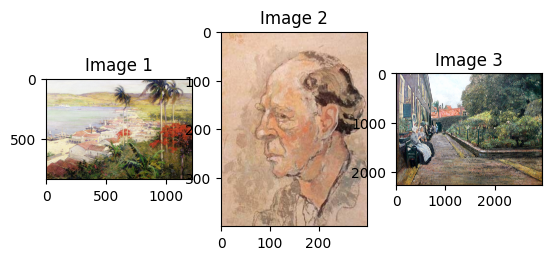

In [ ]:
# Display 3 randomly chosen images using matplotlib.  Consider the colormap so

image1 = Image.open(get_image_path(model_df.iloc[0]['art_style'], model_df.iloc[0]['painting'])).convert('RGB')
image2 = Image.open(get_image_path(model_df.iloc[10]['art_style'], model_df.iloc[10]['painting'])).convert('RGB')
image3 = Image.open(get_image_path(model_df.iloc[200]['art_style'], model_df.iloc[200]['painting'])).convert('RGB')

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(image1, cmap='gray')
ax1.set_title('Image 1')
ax2.imshow(image2, cmap='gray')
ax2.set_title('Image 2')
ax3.imshow(image3, cmap='gray')
ax3.set_title('Image 3')

In [ ]:
# transforms because the images are not the same size

transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Match the expected input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])


In [ ]:
def inspect_captions(captions_tensor, tokenizer):
    for i in range(min(3, captions_tensor.size(0))):  # Just print the first few examples
        caption_ids = captions_tensor[i].cpu().numpy()
        caption = tokenizer.decode(caption_ids, skip_special_tokens=True)
        print(f"Original Caption [{i}]: {caption}")


In [ ]:
def print_predictions(outputs, tokenizer):
    _, predicted_indices = torch.max(outputs, 2)
    for i, caption_indices in enumerate(predicted_indices):
        if i < 3:  # Just print the first few examples
            caption = tokenizer.decode(caption_indices.cpu().numpy(), skip_special_tokens=True)
            print("Predicted Caption:", caption)


In [ ]:
# creating the dataset and dataloader

train_dataset = CaptionDataset(train_df, tokenizer, transform)
val_dataset = CaptionDataset(val_df, tokenizer, transform)
test_dataset = CaptionDataset(test_df, tokenizer, transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, collate_fn=collate_fn)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, collate_fn=collate_fn)

In [ ]:
# Using CNN to extract features from images (ResNet)
# Using LSTM to generate captions

import torch
import torch.nn as nn
from torchvision.models import resnet50
from transformers import BertModel, BertConfig

In [ ]:
class ImageCaptioningModel(nn.Module):
    def __init__(self, embed_dim, hidden_dim, vocab_size, num_layers):
        super(ImageCaptioningModel, self).__init__()

        # load pretrained resnet model
        resnet = resnet50(pretrained=True)

        # freeze the resnet layers so that they are not trained
        for param in resnet.parameters():
            param.requires_grad = False

        # remove the classification layer and replace it with a linear layer
        # this reduces the output dimension to match the embedding dimension
        resnet.fc = nn.Linear(resnet.fc.in_features, embed_dim)
        self.cnn = resnet

        # LSTM for generating captions
        self.lstm = nn.LSTM(embed_dim, hidden_dim, num_layers, batch_first=True, dropout=0.5 if num_layers > 1 else 0)

        # output layer that maps the hidden state output dimension to the vocab size
        # this helps to predict the next word in the caption
        self.linear = nn.Linear(hidden_dim, vocab_size)

    def forward(self, images, captions):

        # extract features from images
        features = self.cnn(images)

        # unsqueeze the dimensions of the features tensor
        # repeat it so that the same features are used for each word in the caption
        features = features.unsqueeze(1).repeat(1, captions.size(1), 1)

        # get output from the LSTM
        # a new hidden state is generated for each word in the caption
        lstm_output, _ = self.lstm(features)

        # linear layer takes output and predicts the next word in the caption
        outputs = self.linear(lstm_output)

        return outputs

In [ ]:
from torchtext.data.metrics import bleu_score

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
image_to_caption_model = ImageCaptioningModel(embed_dim=256, hidden_dim=512, vocab_size=len(tokenizer.vocab), num_layers=1)
model =image_to_caption_model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


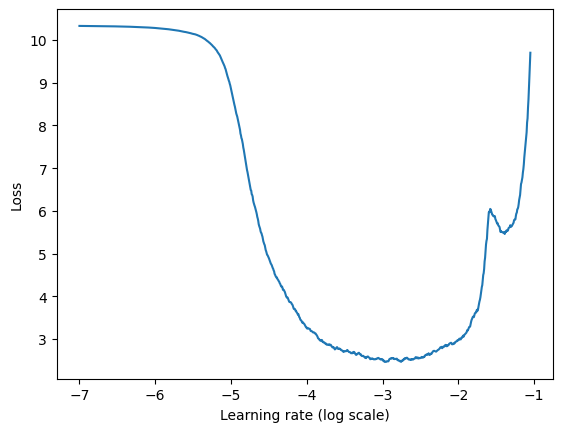

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

def find_learning_rate(model, train_loader, criterion, init_value=1e-7, final_value=10.0, beta=0.98):
    num = len(train_loader) - 1
    mult = (final_value / init_value) ** (1/num)
    lr = init_value
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    avg_loss = 0.0
    best_loss = float('inf')
    batch_num = 0
    losses = []
    log_lrs = []

    for data in train_loader:
        batch_num += 1
        # Get the inputs and labels
        inputs, labels = data['images'].to(device), data['captions'].to(device)

        # Clear gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs, labels[:, :-1])
        loss = criterion(outputs.view(-1, outputs.size(-1)), labels[:, 1:].contiguous().view(-1))

        # Compute the smoothed loss
        avg_loss = beta * avg_loss + (1-beta) * loss.item()
        smoothed_loss = avg_loss / (1 - beta**batch_num)

        # Stop if the loss is exploding
        if batch_num > 1 and smoothed_loss > 4 * best_loss:
            break

        # Record the best loss
        if smoothed_loss < best_loss:
            best_loss = smoothed_loss

        # Store the values
        losses.append(smoothed_loss)
        log_lrs.append(np.log10(lr))

        # Do backward pass and step the optimizer
        loss.backward()
        optimizer.step()

        # Update the learning rate
        lr *= mult
        optimizer.param_groups[0]['lr'] = lr

    plt.plot(log_lrs, losses)
    plt.xlabel("Learning rate (log scale)")
    plt.ylabel("Loss")
    plt.show()

# Usage
find_learning_rate(model, train_loader, criterion)


In [ ]:
print(len(train_loader))

2600


In [ ]:
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [ ]:
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, factor=0.1, verbose=True)

In [ ]:
def calculate_bleu(data_loader, model, device, tokenizer):
    candidate_corpus = []
    reference_corpus = []
    model.eval()
    with torch.no_grad():
        for batch in data_loader:
            images = batch['images'].to(device)
            captions = batch['captions'].to(device)
            outputs = model(images, captions[:, :-1])
            # Convert model outputs to text
            output_captions = torch.argmax(outputs, dim=-1)
            for i in range(outputs.size(0)):
                # Convert predicted ids to tokens
                candidate_tokens = tokenizer.convert_ids_to_tokens(output_captions[i], skip_special_tokens=True)
                candidate_corpus.append(candidate_tokens)

                # Convert ground truth ids to tokens
                ref_tokens = tokenizer.convert_ids_to_tokens(captions[i, 1:], skip_special_tokens=True)
                reference_corpus.append([ref_tokens])  # Note: the reference corpus is a list of lists of tokens

    # Compute BLEU score
    bleu = bleu_score(candidate_corpus, reference_corpus)
    return bleu


In [ ]:
def validate_model(model, val_loader, criterion, device):
    model.eval()  # Set model to evaluation mode
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            images = batch['images'].to(device)
            captions = batch['captions'].to(device)
            outputs = model(images, captions[:, :-1])
            loss = criterion(outputs.reshape(-1, outputs.shape[2]), captions[:, 1:].reshape(-1))
            total_val_loss += loss.item()

    average_val_loss = total_val_loss / len(val_loader)
    return average_val_loss


In [ ]:
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()  # Set model to training mode
    total_loss = 0
    for i, batch in enumerate(train_loader):
        images = batch['images'].to(device)
        captions = batch['captions'].to(device)

        for i, caption_ids in enumerate(captions[:3]):  # Loop through the first few captions in the batch
          caption = tokenizer.decode(caption_ids.cpu().tolist(), skip_special_tokens=True)
          print(f"Decoded Caption [{i}]: {caption}")

        # excluding the last word in the caption (<end> token)
        outputs = model(images, captions[:, :-1])

        # offset the caption by one to the right (exclude the <start> token)
        loss = criterion(outputs.view(-1, outputs.size(-1)), captions[:, 1:].contiguous().view(-1))

        optimizer.zero_grad()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        total_loss += loss.item()

        if (i + 1) % 10 == 0:
            print(f"Epoch Batch {i+1}: Loss = {loss.item():.4f}")

        print_predictions(outputs, tokenizer)

    average_loss = total_loss / len(train_loader)
    return average_loss

In [ ]:
def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs, device):
    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")

        # Train one epoch
        train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
        print(f"Training Loss: {train_loss:.4f}")

        # Validate after training
        val_loss = validate_model(model, val_loader, criterion, device)
        print(f"Validation Loss: {val_loss:.4f}")

        # Calculate BLEU score for the validation set
        bleu = calculate_bleu(val_loader, model, device, tokenizer)
        print(f"Validation BLEU Score: {bleu:.4f}")

        scheduler.step(val_loss)

# Assuming 'model', 'train_loader', 'val_loader', 'optimizer', 'criterion' and 'device' are defined
train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, 5, device)

Epoch 1/5
Decoded Caption [0]: i feel content because this owl seems very happy with himself.
Decoded Caption [1]: seems very basic, just a few pieces of bamboo. need more
Decoded Caption [2]: this is neat because the people look like the kind of people you would see in 15th - 16th century paintings but the style is not like those from that time that i have seen before.
Predicted Caption: the woman is the the the the the the
Predicted Caption: the looks like the the the the the the
Predicted Caption: the woman is the the the the the the the the
Decoded Caption [0]: this man has a downcast facial expression, as though his heart is heavy
Decoded Caption [1]: an obese child with a devil and angel on his shoulder.
Decoded Caption [2]: a man is dying in the arms of the people around him
Predicted Caption: the man looks the the the the the the the
Predicted Caption: the woman is the the the the the the
Predicted Caption: the man is the the the the the the the
Decoded Caption [0]: pencil draw

KeyboardInterrupt: 

In [ ]:
torch.save(model.state_dict(), 'image_to_cap_model.pth')